# No Lineal

## Ejemplo 1: Asignación de presupuesto

In [1]:
import numpy as np
from scipy.optimize import minimize

def impacto_negativo(x):
    x1, x2 = x
    return -(100 * (1 - np.exp(-0.05 * x1)) + 80 * (1 - np.exp(-0.08 * x2)))

restricciones = [
    {'type': 'ineq', 'fun': lambda x: 10000 - (x[0] + x[1])},
    {'type': 'ineq', 'fun': lambda x: x[0] - 2000},
    {'type': 'ineq', 'fun': lambda x: x[1] - 1000}
]

bounds = [(2000, None), (1000, None)]

x0 = [5000, 3000]

res = minimize(impacto_negativo, x0, method='SLSQP', bounds=bounds, constraints=restricciones)

if res.success:
    x1_opt, x2_opt = res.x
    impacto_max = -res.fun
    print(f'Inversion optima en Google Ads: ${x1_opt:.2f}')
    print(f'Inversion optima en Instagram Ads: ${x2_opt:.2f}')
    print(f'Impacto total maximo: {impacto_max:.2f}')
    print(f'Total invertido: ${x1_opt + x2_opt:.2f}')
else:
    print('Error:', res.message)

Inversion optima en Google Ads: $5000.00
Inversion optima en Instagram Ads: $3000.00
Impacto total maximo: 180.00
Total invertido: $8000.00


## Ejemplo 2: Producción óptima de dos productos

In [2]:
# Funcion objetivo (negativa para maximizar)
def ganancia_negativa(x):
    x1, x2 = x
    return -(40 * x1 + 30 * x2)

# Restriccion 1: x1^2 + x2^2 <= 2500
def restriccion_maquina(x):
    return 2500 - (x[0]**2 + x[1]**2)

# Restriccion 2: x1 / (x2 + 1) <= 4
def restriccion_compatibilidad(x):
    return 4 * (x[1] + 1) - x[0]

# Lista de restricciones
restricciones = [
    {'type': 'ineq', 'fun': restriccion_maquina},
    {'type': 'ineq', 'fun': restriccion_compatibilidad}
]

# Limites (x1, x2 >= 0)
bounds = [(0, None), (0, None)]

# Valor inicial factible
x0 = [1, 1]

# Optimizacion
from scipy.optimize import minimize
res = minimize(ganancia_negativa, x0, method='SLSQP', bounds=bounds, constraints=restricciones)

# Mostrar resultado
if res.success:
    x1_opt, x2_opt = res.x
    ganancia_max = -res.fun
    print(f'Produccion optima de A: {x1_opt:.2f} unidades')
    print(f'Produccion optima de B: {x2_opt:.2f} unidades')
    print(f'Ganancia maxima: ${ganancia_max:.2f}')
else:
    print('Error:', res.message)

Produccion optima de A: 40.00 unidades
Produccion optima de B: 30.00 unidades
Ganancia maxima: $2500.00


## Ejemplo 3: Optimización en biotecnología

In [3]:
import numpy as np
from scipy.optimize import minimize

def costo(x):
    x1, x2 = x
    return np.sin(x1) * np.cos(x2) + 0.1 * (x1 + x2) + 25

restricciones = [
    {'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 2},
    {'type': 'ineq', 'fun': lambda x: 8 - (x[0] + 2 * x[1])}
]

bounds = [(0, 6), (0, 6)]

np.random.seed(42)
resultados = []
for i in range(10):
    x0 = np.random.uniform(0, 6, size=2)
    res = minimize(costo, x0, method='SLSQP', bounds=bounds, constraints=restricciones)
    if res.success:
        resultados.append((res.fun, res.x))

resultados.sort()
mejor_valor, mejor_x = resultados[0]
print(f'Mejor solucion encontrada: x1 = {mejor_x[0]:.4f}, x2 = {mejor_x[1]:.4f}')
print(f'Costo minimo estimado: {mejor_valor:.4f}')

Mejor solucion encontrada: x1 = 1.4701, x2 = 3.0409
Costo minimo estimado: 24.4612


# Multiobjetivo

## Ejemplo 0

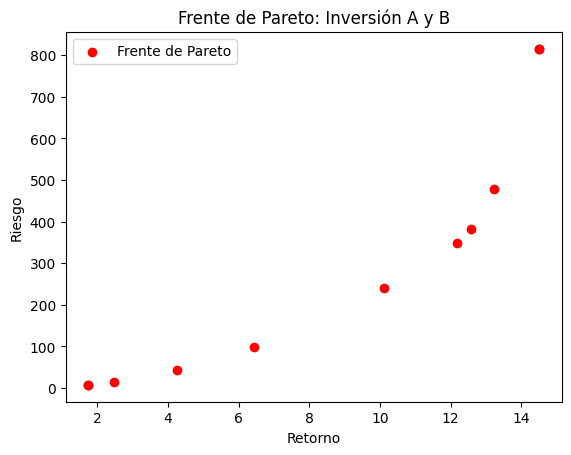

In [9]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# --------------------
# Funciones objetivo
# --------------------
def f1(x):
    return -(0.1*x[0] + 0.15*x[1])  # retorno a maximizar -> invertimos
def f2(x):
    return 0.05*x[0]**2 + 0.1*x[1]**2  # riesgo a minimizar

# --------------------
# Restricciones
# --------------------
def constraint_sum(x):
    return 100 - (x[0] + x[1])  # x[0]+x[1] <= 100

cons = ({'type': 'ineq', 'fun': constraint_sum},)

# --------------------
# Bounds
# --------------------
bounds = [(10,100),(5,100)]

# --------------------
# Normalización inicial (para ponderación)
# --------------------
# Puntos iniciales para estimar min/max
initial_points = [[10,5],[50,30],[80,15],[20,70],[60,20]]
f1_vals = np.array([f1(x) for x in initial_points])
f2_vals = np.array([f2(x) for x in initial_points])
f1_min, f1_max = f1_vals.min(), f1_vals.max()
f2_min, f2_max = f2_vals.min(), f2_vals.max()

# --------------------
# Generar frente de Pareto con distintos alphas
# --------------------
alphas = np.linspace(0,1,11)
pareto_points = []

for alpha in alphas:
    def weighted(x):
        f1_val = f1(x)
        f2_val = f2(x)
        f1_norm = (f1_val - f1_min)/(f1_max - f1_min) if f1_max!=f1_min else 0
        f2_norm = (f2_val - f2_min)/(f2_max - f2_min) if f2_max!=f2_min else 0
        return alpha*f1_norm + (1-alpha)*f2_norm

    x0 = [50, 25]  # punto inicial factible
    res = minimize(weighted, x0=x0, bounds=bounds, constraints=cons, method='SLSQP')
    if res.success:
        pareto_points.append([res.x[0], res.x[1], -f1(res.x), f2(res.x)])

pareto_points = np.array(pareto_points)

# --------------------
# Graficar
# --------------------
plt.scatter(pareto_points[:,2], pareto_points[:,3], c='red', label='Frente de Pareto')
plt.xlabel("Retorno")
plt.ylabel("Riesgo")
plt.title("Frente de Pareto: Inversión A y B")
plt.legend()
plt.show()

## Ejemplo 1: Producción con objetivos conflictivos

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def ganancia_negativa(x):
    return -(40 * x[0] + 30 * x[1])

def contaminacion(x):
    return x[0]**2 + 2 * x[1]**2

def objetivo_combinado(x, w1, w2):
    ganancia_norm = ganancia_negativa(x) / 1000
    contaminacion_norm = contaminacion(x) / 10000
    return w1 * ganancia_norm + w2 * contaminacion_norm

restricciones = [
    {'type': 'ineq', 'fun': lambda x: 100 - (x[0] + x[1])},
    {'type': 'ineq', 'fun': lambda x: x[0] - 10},
    {'type': 'ineq', 'fun': lambda x: x[1] - 5}
]

bounds = [(10, None), (5, None)]
x0 = [50, 30]

pesos = [(0.1, 0.9), (0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)]
resultados = []

for w1, w2 in pesos:
    res = minimize(lambda x: objetivo_combinado(x, w1, w2), x0,
                   method='SLSQP', bounds=bounds, constraints=restricciones)
    if res.success:
        x1_opt, x2_opt = res.x
        ganancia = -ganancia_negativa([x1_opt, x2_opt])
        contam = contaminacion([x1_opt, x2_opt])
        resultados.append((ganancia, contam, x1_opt, x2_opt, w1, w2))

print("Frente de Pareto:")
print("Ganancia | Contaminacion | x1 | x2 | w1 | w2")
for gan, cont, x1, x2, w1, w2 in resultados:
    print(f"{gan:.1f} | {cont:.1f} | {x1:.1f} | {x2:.1f} | {w1:.1f} | {w2:.1f}")

Frente de Pareto:
Ganancia | Contaminacion | x1 | x2 | w1 | w2
1138.6 | 632.4 | 22.2 | 8.3 | 0.1 | 0.9
3738.1 | 6819.7 | 73.8 | 26.2 | 0.3 | 0.7
3833.3 | 7500.0 | 83.3 | 16.7 | 0.5 | 0.5
3950.0 | 9075.0 | 95.0 | 5.0 | 0.7 | 0.3
3950.0 | 9075.0 | 95.0 | 5.0 | 0.9 | 0.1


## Ejemplo 2: Logística con tres objetivos

In [6]:
def costo(x):
    return 5 * x[0] + 3 * x[1] + 2 * x[2]

def tiempo(x):
    return 2 * x[0] + 4 * x[1] + 3 * x[2]

def confiabilidad_negativa(x):
    return -(0.9 * x[0] + 0.8 * x[1] + 0.95 * x[2])

def objetivo_combinado(x, w1, w2, w3):
    costo_norm = costo(x) / 100
    tiempo_norm = tiempo(x) / 100
    conf_norm = confiabilidad_negativa(x) / 50
    return w1 * costo_norm + w2 * tiempo_norm + w3 * conf_norm

restricciones = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 50}
]

bounds = [(0, None), (0, None), (0, None)]
x0 = [20, 15, 15]

pesos = [(0.6, 0.2, 0.2), (0.2, 0.6, 0.2), (0.2, 0.2, 0.6), (0.33, 0.33, 0.34)]
resultados = []

for w1, w2, w3 in pesos:
    res = minimize(lambda x: objetivo_combinado(x, w1, w2, w3), x0,
                   method='SLSQP', bounds=bounds, constraints=restricciones)
    if res.success:
        x1_opt, x2_opt, x3_opt = res.x
        cost = costo([x1_opt, x2_opt, x3_opt])
        time = tiempo([x1_opt, x2_opt, x3_opt])
        conf = -confiabilidad_negativa([x1_opt, x2_opt, x3_opt])
        resultados.append((cost, time, conf, x1_opt, x2_opt, x3_opt))

print("Soluciones del frente de Pareto:")
print("Costo | Tiempo | Confiabilidad | x1 | x2 | x3")
for cost, time, conf, x1, x2, x3 in resultados:
    print(f"{cost:.1f} | {time:.1f} | {conf:.2f} | {x1:.1f} | {x2:.1f} | {x3:.1f}")

Soluciones del frente de Pareto:
Costo | Tiempo | Confiabilidad | x1 | x2 | x3
100.0 | 150.0 | 47.50 | 0.0 | 0.0 | 50.0
181.7 | 122.8 | 46.14 | 27.2 | 0.0 | 22.8
100.0 | 150.0 | 47.50 | 0.0 | 0.0 | 50.0
100.0 | 150.0 | 47.50 | 0.0 | 0.0 | 50.0


## Ejemplo 3: Inversión con riesgo y retorno

In [7]:
import numpy as np
from scipy.optimize import minimize

def retorno_negativo(x):
    # -(0.12 x1 + 0.08 x2 + 0.15 x3)
    return -(0.12 * x[0] + 0.08 * x[1] + 0.15 * x[2])

def riesgo(x):
    # 0.2 x1^2 + 0.1 x2^2 + 0.3 x3^2
    return 0.2 * x[0]**2 + 0.1 * x[1]**2 + 0.3 * x[2]**2

# Gradientes analíticos
def grad_retorno_negativo(_x):
    # derivada de -(0.12, 0.08, 0.15)·x
    return np.array([-0.12, -0.08, -0.15])

def grad_riesgo(x):
    # derivada de (0.2 x1^2, 0.1 x2^2, 0.3 x3^2)
    return np.array([0.4*x[0], 0.2*x[1], 0.6*x[2]])

def objetivo_combinado(x, w1, w2):

    ret_neg_norm = retorno_negativo(x) / 1e4
    riesgo_norm  = riesgo(x)          / 1e9
    return w1 * ret_neg_norm + w2 * riesgo_norm

def grad_objetivo_combinado(x, w1, w2):
    g_ret  = grad_retorno_negativo(x) / 1e4
    g_risk = grad_riesgo(x)           / 1e9
    return w1 * g_ret + w2 * g_risk

# -----------------------------
# Restricción y cotas
# -----------------------------
presupuesto = 100_000.0
restricciones = [{
    'type': 'eq',
    'fun': lambda x: x[0] + x[1] + x[2] - presupuesto,
    'jac': lambda x: np.array([1.0, 1.0, 1.0])
}]
bounds = [(0.0, None), (0.0, None), (0.0, None)]

# Punto inicial factible
x0 = np.array([40_000.0, 30_000.0, 30_000.0])

# -----------------------------
# Barrido de pesos
# -----------------------------
pesos = [(0.1, 0.9), (0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)]
resultados = []

for w1, w2 in pesos:
    res = minimize(
        fun=lambda x: objetivo_combinado(x, w1, w2),
        x0=x0,
        method='SLSQP',
        jac=lambda x: grad_objetivo_combinado(x, w1, w2),
        bounds=bounds,
        constraints=restricciones,
        options={'disp': False, 'ftol': 1e-12, 'maxiter': 2000}
    )
    if not res.success:
        print(f"Falló para (w1,w2)=({w1},{w2}):", res.message)
        continue

    x1, x2, x3 = res.x
    ret  = -(0.12*x1 + 0.08*x2 + 0.15*x3)
    risk =  0.2*x1**2 + 0.1*x2**2 + 0.3*x3**2
    resultados.append((w1, w2, -ret, risk, x1, x2, x3))

print("Frente de Pareto - Inversión:")
print("w1  w2  | Retorno   | Riesgo      | x1       | x2       | x3")
for w1, w2, ret, risk, x1, x2, x3 in resultados:
    print(f"{w1:.1f} {w2:.1f} | ${ret:9.0f} | {risk:10.0f} | ${x1:7.0f} | ${x2:7.0f} | ${x3:7.0f}")


Frente de Pareto - Inversión:
w1  w2  | Retorno   | Riesgo      | x1       | x2       | x3
0.1 0.9 | $    10442 |  545889450 | $  27727 | $  53232 | $  19040
0.3 0.7 | $    10666 |  551924861 | $  29026 | $  49481 | $  21494
0.5 0.5 | $    11050 |  578988764 | $  31873 | $  42772 | $  25356
0.7 0.3 | $    11978 |  730512764 | $  36304 | $  27608 | $  36088
0.9 0.1 | $    13788 | 1392283690 | $  40390 | $      0 | $  59610
